In [1]:
import numpy as np
import scipy.constants as pc
import scipy.integrate as scigrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Constants
a = pc.physical_constants['Bohr radius'][0] # Bohr radius 
E0 = pc.physical_constants['Rydberg constant times hc in eV'][0] #rydberg 
m = pc.m_e # electron mass
hbar = pc.hbar # Planck's constant over 2*pi
e = pc.e # elementary charge
epsilon = pc.epsilon_0
#N = 1000
h = 0.0005*a #steps 
L = 25*a #r infinity

In [25]:
# Potential function
def V(x): 
    return -e**2/(4*np.pi*epsilon*x)
def f(r,x,E, l):
    R = r[0] 
    S = r[1] 
    fR = S
    fS = (l*(l+1)/x**2 + (2*m/hbar**2)*(V(x) - E))*R #COV R --> rR
    return np.array([fR,fS],float)
    # Calculate the wavefunction for a particular energy 
def solve(E,l): 
    R = 0.0 #R(h) = 0 
    S = 1.0 #S(h) = 1 left boundary conditions 
    r = np.array([R,S],float)
    Rpoints = []
    xpoints = np.arange(h,L,h)
    for x in xpoints:#start integration starting at x=h 
        Rpoints.append(r[0]/L)
        k1 = h*f(r,x,E,l) 
        k2 = h*f(r+0.5*k1,x+0.5*h,E,l)
        k3 = h*f(r+0.5*k2,x+0.5*h,E,l)
        k4 = h*f(r+k3,x+h,E,l) 
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]/L, Rpoints, xpoints #division to accomodate for COV

In [26]:
## Part B 
# Main program to find the energy using the secant method 
n = 1.0 
l = 0.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_1, xpoints_1 = solve(E1,l)
target = e/200
while abs(E1-E2)>target: 
    R1 = R2
    R2,Rpoints_1,xpoints_1 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
print("E =",E2/e,"eV")

E = -13.578686450420925 eV


In [27]:
n = 2.0 
l = 0.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_2, xpoints_2 = solve(E1,l)
while abs(E1-E2)>target: 
    R1 = R2
    R2, Rpoints_2, xpoints_2 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
print("E =",E2/e,"eV")

E = -3.3978308080004362 eV


In [28]:
# Part B Part 2
n = 2.0 
l = 1.0
E1 = -15*e/n**2 #bracket energies 
E2 = -13*e/n**2
R2, Rpoints_3, xpoints_3 = solve(E1,l)
while abs(E1-E2)>target: 
    R1 = R2
    R2, Rpoints_3, xpoints_3 = solve(E2,l) 
    E1,E2 = E2,E2-R2*(E2-E1)/(R2-R1) 
print("E =",E2/e,"eV")

E = -3.401426058123551 eV


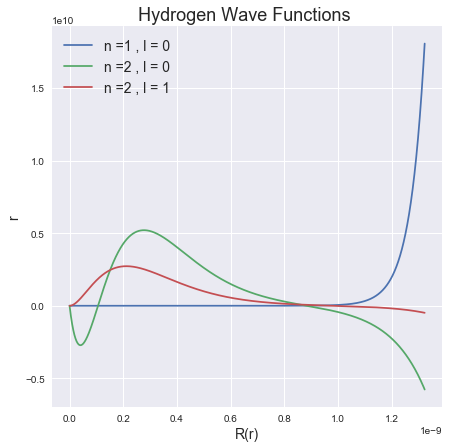

In [30]:
# Part C 
# Integration 
# you can use scigrate.simps, I asked the TA
from scipy.integrate import simps
norm_1 = simps(Rpoints_1, xpoints_1)
norm_2 = simps(Rpoints_2, xpoints_2)
norm_3 = simps(Rpoints_3, xpoints_3)

#normalize
Rpoints_1 = Rpoints_1/norm_1
Rpoints_2 = Rpoints_2/norm_2
Rpoints_3 = Rpoints_3/norm_3

#plots
plt.figure(figsize =(7,7))
plt.plot(xpoints_1,Rpoints_1, label = 'n =1 , l = 0')
plt.plot(xpoints_2, Rpoints_2,  label = 'n =2 , l = 0' )
plt.plot(xpoints_3, Rpoints_3 ,  label = 'n =2 , l = 1')
plt.title( 'Hydrogen Wave Functions ', fontsize = '18')
plt.xlabel('R(r)', fontsize = '14')
plt.ylabel('r', fontsize = '14')
plt.legend(fontsize = '14')

In [35]:
# Part D
a = 1
r = xpoints_1
# Analytic Solution for n = 1 , l = 0 
pos_1_0 = 2/a **(3/2) * np.exp(-r/a)
#Analytic Solution for n = 2, l = 0
pos_2_0 = 1/(2*np.sqrt(2))* a ** (3/2)*(2-r/a)* np.exp(-r/a)
#Analytic Solution for n = 2, l = 1
pos_2_1 = 1/(2*np.sqrt(6))* a ** (3/2)*(r/a)* np.exp(-r/a)


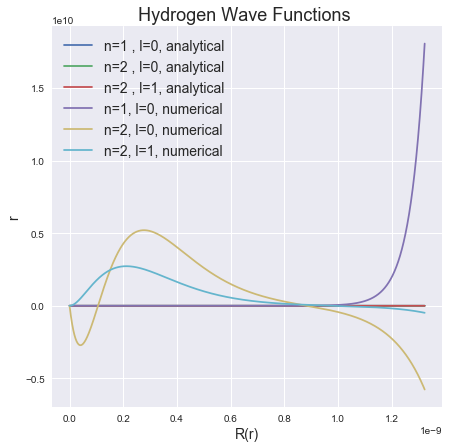

In [37]:
plt.figure(figsize =(7,7))
plt.plot(r,pos_1_0 , label = 'n=1 , l=0, analytical')
plt.plot(r, pos_2_0 ,  label = 'n=2 , l=0, analytical' )
plt.plot(r, pos_2_1 ,  label = 'n=2 , l=1, analytical')
plt.plot(r, Rpoints_1, label = 'n=1, l=0, numerical')
plt.plot(r, Rpoints_2, label = 'n=2, l=0, numerical')
plt.plot(r, Rpoints_3, label = 'n=2, l=1, numerical')
plt.title( 'Hydrogen Wave Functions ', fontsize = '18')
plt.xlabel('R(r)', fontsize = '14')
plt.ylabel('r', fontsize = '14')
plt.legend(fontsize = '14')